In [1]:
import re

import pandas as pd
from pathlib import Path
from ploting import *

In [2]:
root_path = "horeka"

In [3]:
name_re = re.compile("(weak|strong)_scaling-d_(\d+)-n_(\d+)-([\w_]+)_comm-(gpu|cpu)-nodes_(\d+)")

In [4]:
time_re = re.compile("DURATION:\s*(\d+(\.\d+)?(e[+-]\d+)?)")

In [5]:
data = []
for file in Path(f"{root_path}/data").iterdir():
    if m := name_re.search(file.name):
        with open(file, "r") as input:
            if t_m := time_re.search(input.read()):
                duration = t_m.group(1)
                data.append({"scaling": m.group(1), "dim": m.group(2), "n": m.group(3), "comm_pattern": m.group(4),
                             "type": m.group(5), "nodes": m.group(6), "time": duration})
df = pd.DataFrame(data).drop(columns=["scaling", "type"]).astype({"dim": int, "n": int, "nodes": int, "time": float})
df

,dim,n,comm_pattern,nodes,time
0,2,100,stencil,1,0.000040
1,2,100000,stencil,56,0.000391
2,2,100,stencil,14,0.000039
3,3,10000,stencil,1,0.000064
4,2,100,stencil,2,0.000043
...,...,...,...,...,...
149,3,10000000,optimal,2,0.005775
150,3,10000000,optimal,28,0.005798
151,3,10000000,optimal,4,0.005742
152,3,10000000,optimal,56,0.005793


In [6]:
piv = df.pivot(index="nodes", columns=["dim", "comm_pattern", "n"], values="time")
piv = piv[piv.columns.sort_values()]
piv

dim                  2                                                    \
comm_pattern   optimal                                                     
n             100       1000      10000     100000    1000000   10000000   
nodes                                                                      
1             0.000033  0.000034  0.000033  0.000048  0.000281  0.002314   
2             0.000034  0.000035  0.000037  0.000049  0.000277  0.002281   
4             0.000034  0.000036  0.000036  0.000050  0.000279  0.002314   
7             0.000035  0.000037  0.000037  0.000053  0.000280  0.002310   
14            0.000036  0.000037  0.000036  0.000054  0.000282  0.002265   
28            0.000037  0.000038  0.000039  0.000054  0.000290  0.002289   
56            0.000038  0.000041  0.000041  0.000055  0.000280  0.002279   

dim                                                   ...         3            \
comm_pattern   stencil                                ...   optimal             
n             100       1000      10000     100000    ...  1000      10000      
nodes                                                 ...                       
1             0.000040  0.000041  0.000045  0.000064  ...  0.000037  0.000050   
2             0.000043  0.000044  0.000044  0.000059  ...  0.000036  0.000051   
4             0.000038  0.000039  0.000042  0.000206  ...  0.000037  0.000051   
7             0.000038  0.000040  0.000041  0.000055  ...  0.000039  0.000052   
14            0.000039  0.000040  0.000043  0.000056  ...  0.000040  0.000053   
28            0.000041  0.000042  0.000047  0.000060  ...  0.000043  0.000056   
56            0.000045  0.000045  0.000049  0.000391  ...  0.000043  0.000054   

dim                                                                       \
comm_pattern                                 stencil                       
n             100000    1000000   10000000  100       1000      10000      
nodes                                                                      
1             0.000070  0.000533  0.005796  0.000035  0.000041  0.000064   
2             0.000070  0.000532  0.005775  0.000046  0.000058  0.000080   
4             0.000071  0.000534  0.005742  0.000054  0.000064  0.000870   
7             0.000072  0.000533  0.005784  0.000055  0.000200  0.000095   
14            0.000073  0.000534  0.005770  0.000062  0.000075  0.000093   
28            0.000074  0.000533  0.005798  0.000070  0.000073  0.000682   
56            0.000102  0.000533  0.005793  0.000074  0.000076  0.000094   

dim                               
comm_pattern                      
n             100000    1000000   
nodes                             
1             0.000164  0.000525  
2             0.000148  0.000723  
4             0.000352  0.000726  
7             0.000355  0.000710  
14            0.000501  0.000630  
28            0.000434  0.000574  
56            0.000431  0.000575  

[7 rows x 22 columns]

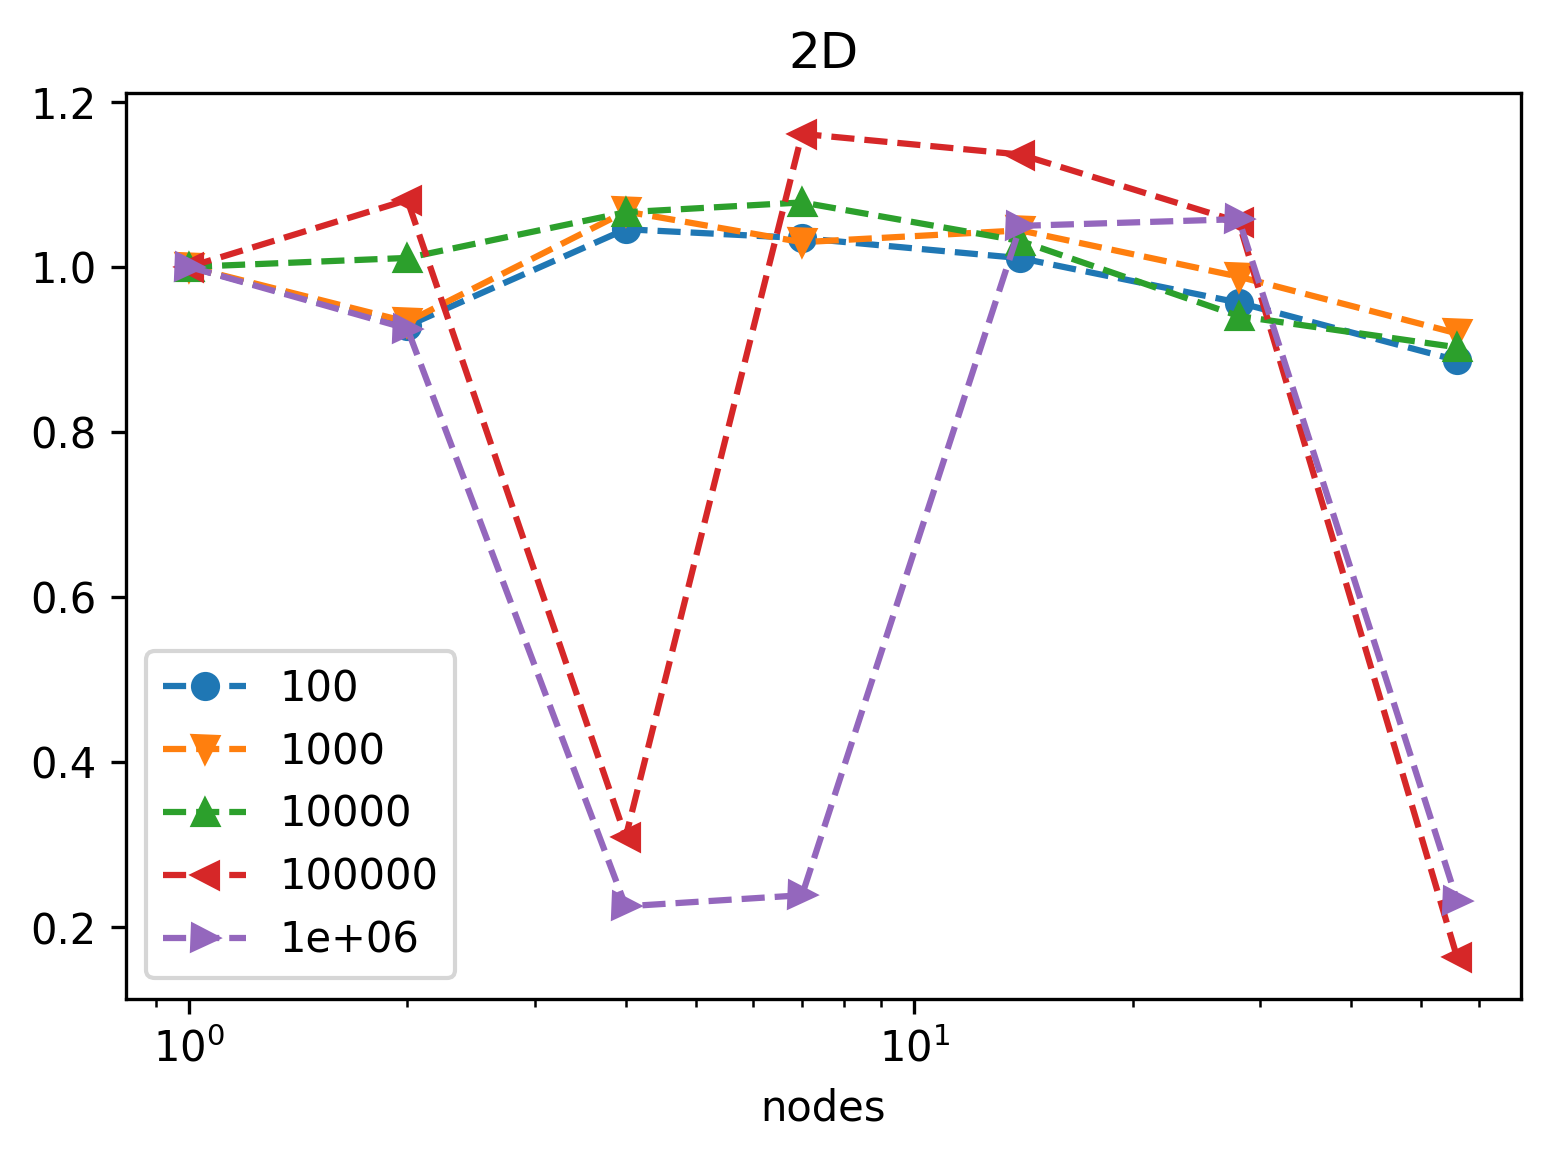

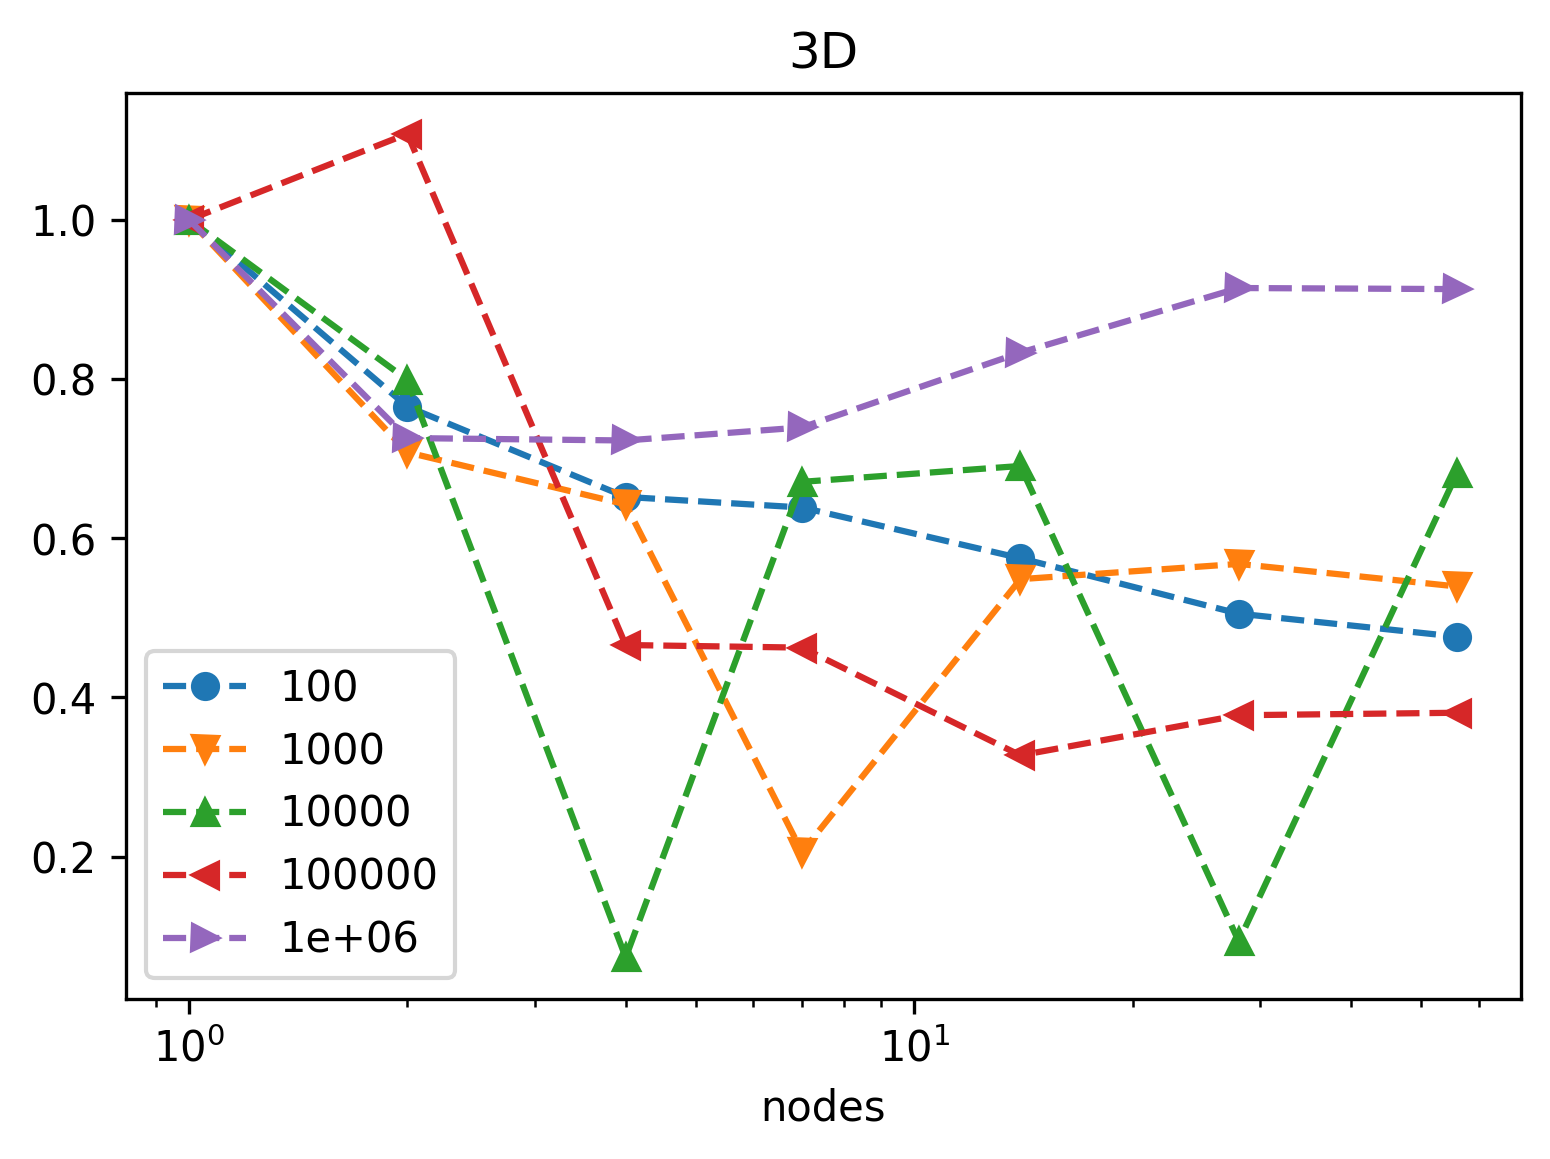

In [7]:
for dim in piv.columns.levels[0]:
    _df = piv[dim]
    fig, ax = plt.subplots(dpi=300)
    for gc in piv.columns.levels[1]:
        if gc == "stencil":
            ax.set_prop_cycle(default_cycler if gc == "optimal" else dashed_cylcer)
            ax.set_title(f"{dim}D")
            _df[gc].apply(lambda s: s[1] / s).plot(ax=ax, legend=False, logx=True)
            ax.legend([f"{n:g}" for n in piv.columns.levels[2]])
    #fig.savefig(f"{root_path}/img/{dim}d.png")